In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_excel("../Data/VN_GDP_2021.xlsx")
df['date'] = pd.to_datetime([f'{x[:4]}{x[-2:]}' for x in df['Date']])
df.index = df["date"]
df.dropna(inplace=True)

## GDP1

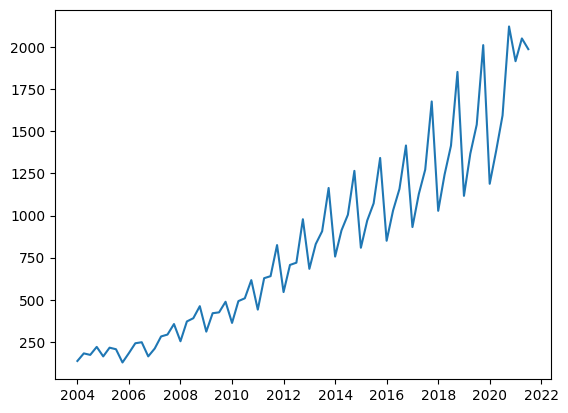

In [31]:
plt.plot(df["gdp1"])

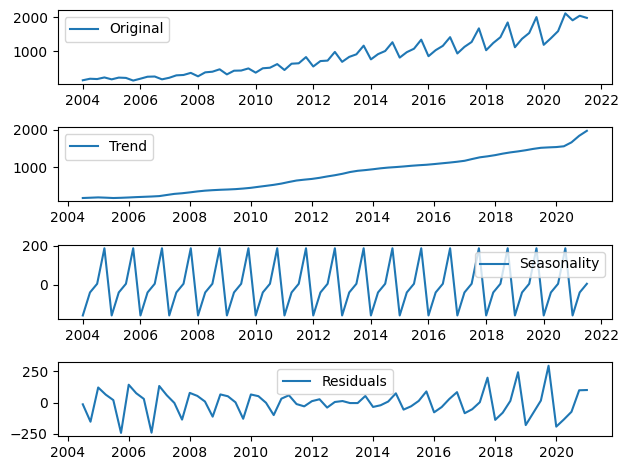

In [35]:
gdp1 = df["gdp1"]
decomposition = seasonal_decompose(gdp1, period=4, model="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(gdp1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## GDP2

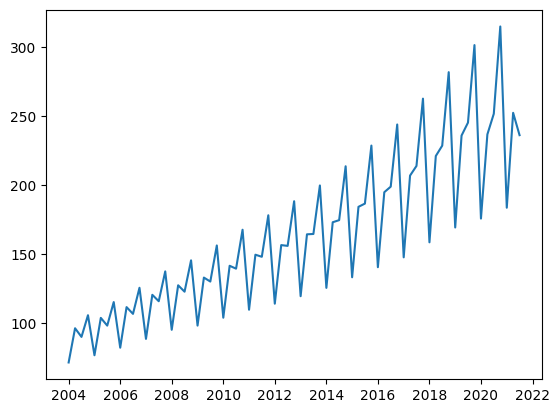

In [33]:
plt.plot(df["gdp2"])

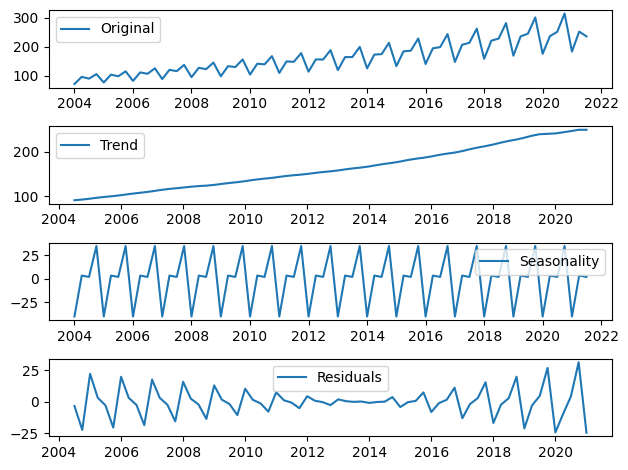

In [32]:
gdp2 = df["gdp2"]
decomposition = seasonal_decompose(gdp2, period=4)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(gdp2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()